## Heading

Regular text

**bold**

- bullet 1
- bullet 2

## iris dataset - supervised learning

Bunch - type set used by scikit that holds data sets and their attributes 
 - bunch.data calls the data
 - .feature_names calls the name of the features
 - .target calls the integers representing the species of each observation
 - .target_names calls what species the integers represent
 
Scikit-learn assumes that:
  1. features and response are separate objects
  2. features and response should be numeric
  3. features and response should be NumPy arrays
  4. features and response should have specific shapes
      Data shapes (m=# of observation, n=# of features)

In [4]:
#import load_iris function from datasets module
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()
type(iris)

sklearn.datasets.base.Bunch

In [ ]:
print iris.data

In [9]:
print iris.feature_names

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [10]:
print iris.target

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
print iris.target_names

['setosa' 'versicolor' 'virginica']


In [12]:
print type(iris.data)

<type 'numpy.ndarray'>


In [13]:
print iris.data.shape

(150, 4)


In [14]:
print iris.target.shape

(150,)


In [16]:
X=iris.data #Matrix
y=iris.target #vector

**step 1: Scikit-learn 4 step modeling pattern**

In [20]:
from sklearn.neighbors import KNeighborsClassifier

**step 2: Instantiate the estimator**

In [22]:
knn = KNeighborsClassifier(n_neighbors=1)

** step 3: Fit the model with data ("model training")**

In [23]:
print knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')


In [24]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')

**step 4: Predict the response for a new observation**

In [25]:
knn.predict([3,5,4,2]) #predicts virginica

array([2])

In [26]:
X_new=[[3,5,4,2],[5,4,3,2]]
knn.predict(X_new)

array([2, 1])

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
knn.predict(X_new)

array([1, 1])

**these 4 step implementation is consistent along other fitting models**

In [30]:
#import the class
from sklearn.linear_model import LogisticRegression

#instantiate the model (using default parameters)
logreg = LogisticRegression()

#fit the model with data
logreg.fit(X,y)

#predict the response for new observations
logreg.predict(X_new)


array([2, 0])

## Evaluation procedure #1: Train and test on entire dataset (same set)
How do we know which model to use?

*This method is not useful for testing models*

In [34]:
#predict the y values for X (on the same data set)
y_pred = logreg.predict(X)

#compute classification accuracy for the logistic regression model
from sklearn import metrics
print metrics.accuracy_score(y,y_pred) #TRAINING ACCURACY b/c we are testing on training set

0.96


**KNN, k=5**

In [35]:
y_pred = knn.predict(X)
print metrics.accuracy_score(y,y_pred)

0.966666666667


**KNN, k=1** This will always overfit, give training accuracy of 1

In [38]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
y_pred=knn.predict(X)
print metrics.accuracy_score(y,y_pred)

1.0


## Evaluation procedure #2: Train/test split
Train the model on the training set and test the model on the testing set

In [39]:
print X.shape
print y.shape

(150, 4)
(150,)


In [52]:
#step 1: split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=4) 
#                                           specifies seed for rng----------^

In [44]:
#step 2: train the model on the training set
logreg= LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [45]:
#step 3: make predictions on the testing set
y_pred=logreg.predict(X_test)

#compare values
print metrics.accuracy_score(y_test,y_pred)

0.933333333333


**Repeat for KNN with k=5**

In [46]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print metrics.accuracy_score(y_test,y_pred)

0.966666666667


**Repeat for KNN with k=1**

In [48]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print metrics.accuracy_score(y_test,y_pred)

0.966666666667


Can we find an even better value for K? -> FOR LOOP

In [53]:
#try K=1 through K=25 and record testing accuracy
k_range = range(1,26)
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

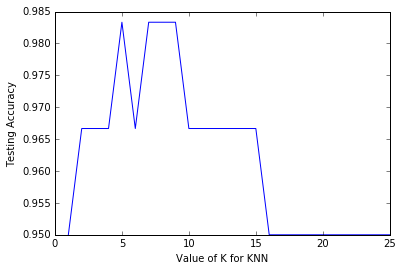

In [56]:
import matplotlib.pyplot as plt

#allow plots to appear within the notebok
%matplotlib inline

plt.plot(k_range,scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

**In general..**

-**Training accuracy** rises as model complexity increases (lower K = more complex)

-**Testing accuract** penalizes models that are too complex or not complex enough

train/test split provides a high-variance estimate of out-of-sample accuracy (highly dependent on random train sample)

but K-fold cross-validation overcomes this limitation

train/test split is still useful beacuse of its flexibility and speed

## Data science pipeline : pandas, seaborn, scikit-learn

**Reading data using pandas**

In [60]:
#import pandas
import pandas as pd

In [65]:
#read CSV file directly from a URL and save the results
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

#display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [66]:
#display the last 5 rows
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [68]:
data.shape

(200, 4)